In [29]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm


In [8]:
data = pd.read_csv('EmployeeSalary.csv') 
data

,ID,WorkingYears,Salary
0,ID01,1,800
1,ID02,2,750
2,ID03,10,1720
3,ID04,11,1500
4,ID05,3,780
...,...,...,...
57,ID58,6,900
58,ID59,20,2970
59,ID60,21,3210
60,ID61,22,3250


In [9]:
#thông kế mô tả
data.describe()

,WorkingYears,Salary
count,62.000000,62.000000
mean,13.032258,1963.548387
std,8.105792,988.237538
min,1.000000,750.000000
25%,6.000000,957.500000
50%,12.000000,1885.000000
75%,20.750000,2955.000000
max,29.000000,3710.000000


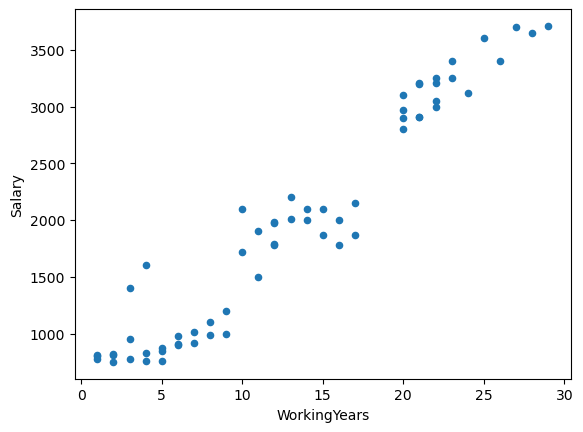

In [10]:
# vẽ đt scatter xem mối qh giữa WorkingYears và Salary
data.plot(kind='scatter', x='WorkingYears',y='Salary')
plt.show()

In [11]:
#xem mối tương quan
data.corr()

,WorkingYears,Salary
WorkingYears,1.0000,0.9652
Salary,0.9652,1.0000


In [12]:
# xóa cột ID
df = data.drop(['ID'], axis=1)

In [13]:
# Chuẩn hóa dl 
sc = StandardScaler()
data_stand = sc.fit_transform(df)
data_stand

array([[-1.49652033, -1.18700905],
       [-1.37214465, -1.2380172 ],
       [-0.37713917, -0.24845906],
       [-0.25276349, -0.47289493],
       [-1.24776896, -1.20741231],
       [-1.12339328, -1.15640416],
       [-0.1283878 ,  0.01678333],
       [-0.00401212,  0.04738822],
       [-0.99901759, -1.1360009 ],
       [-0.87464191, -1.07479111],
       [-0.75026623, -1.06458948],
       [-0.62589054, -0.99317807],
       [-0.50151486, -0.98297644],
       [ 0.12036357,  0.03718659],
       [ 0.24473925,  0.13920289],
       [ 0.36911493, -0.18724928],
       [ 0.49349062, -0.09543461],
       [-1.49652033, -1.17680742],
       [-0.37713917,  0.13920289],
       [-0.25276349, -0.06482972],
       [-0.1283878 ,  0.0065817 ],
       [-0.00401212,  0.24121919],
       [ 0.12036357,  0.13920289],
       [-1.37214465, -1.17680742],
       [-1.24776896, -0.57491123],
       [-1.12339328, -0.37087862],
       [ 0.49349062,  0.19021104],
       [ 0.86661767,  0.85331701],
       [ 0.99099336,

In [14]:
# chuyển về DataFrame
data_stand=pd.DataFrame(data_stand, columns=['WorkingYears','Salary'])
data_stand

,WorkingYears,Salary
0,-1.496520,-1.187009
1,-1.372145,-1.238017
2,-0.377139,-0.248459
3,-0.252763,-0.472895
4,-1.247769,-1.207412
...,...,...
57,-0.874642,-1.084993
58,0.866618,1.026745
59,0.990993,1.271584
60,1.115369,1.312390


In [15]:
#sau khi chuẩn hóa
data_stand.describe()

,WorkingYears,Salary
count,6.200000e+01,6.200000e+01
mean,-4.521473e-17,4.476706e-17
std,1.008163e+00,1.008163e+00
min,-1.496520e+00,-1.238017e+00
25%,-8.746419e-01,-1.026333e+00
50%,-1.283878e-01,-8.013216e-02
75%,9.598994e-01,1.011442e+00
max,1.985999e+00,1.781665e+00


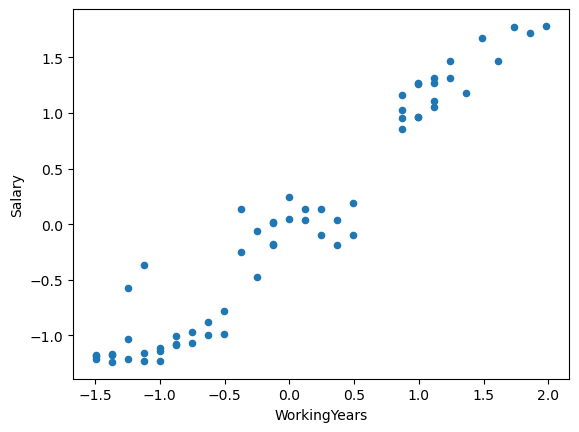

In [16]:
data_stand.plot(kind='scatter', x='WorkingYears',y='Salary')
plt.show()

In [17]:
# tìm ra số cụm tốt nhất
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_stand)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\Thuong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


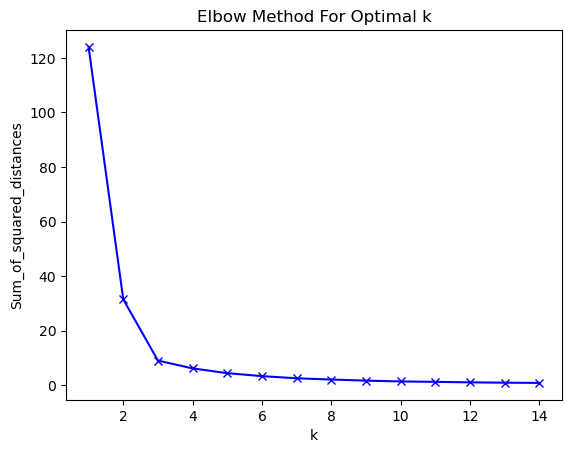

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
# sd K_mean phân cụm k=3
km3 = KMeans(n_clusters=3)
km3 = km3.fit(df)

In [22]:
print(km3.labels_)

[0 0 2 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 1 1 1 2 0 0 0 0 0 2
 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 2]


In [23]:
labels = km3.labels_
labels = pd.DataFrame(labels,columns=['cluster'])
df_clustered=pd.concat([df,labels],axis=1)

In [24]:
df_clustered.sort_values('cluster',ascending = True)

,WorkingYears,Salary,cluster
0,1,800,0
35,9,1200,0
34,8,1100,0
33,7,1010,0
32,6,980,0
...,...,...,...
22,14,2100,2
25,4,1600,2
26,17,2150,2
37,16,2000,2


In [25]:
#xem mỗi 1 cụm có bn phần tử
print(km3.labels_)
df_clustered.groupby('cluster').size()

[0 0 2 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 1 1 1 2 0 0 0 0 0 2
 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 2]


cluster
0    23
1    20
2    19
dtype: int64

In [26]:
# đặc điểm các cụm
df_clustered.groupby('cluster').describe()

WorkingYears                                                      \
               count       mean       std   min   25%   50%    75%   max   
cluster                                                                    
0               23.0   4.652174  2.586832   1.0   2.5   5.0   6.50   9.0   
1               20.0  22.850000  2.777257  20.0  21.0  22.0  24.25  29.0   
2               19.0  12.842105  3.077935   4.0  11.5  13.0  15.00  17.0   

        Salary                                                           \
         count         mean         std     min     25%     50%     75%   
cluster                                                                   
0         23.0   912.173913  157.767277   750.0   805.0   870.0   985.0   
1         20.0  3217.000000  281.164870  2800.0  2992.5  3205.0  3400.0   
2         19.0  1916.842105  187.914065  1500.0  1785.0  1970.0  2055.0   

                 
            max  
cluster          
0        1400.0  
1        3710.0  
2        2200.0

In [27]:
# lọc ra 1 cluster bất kì
df_clustered[df_clustered['cluster']==0]

,WorkingYears,Salary,cluster
0,1,800,0
1,2,750,0
4,3,780,0
5,4,830,0
8,5,850,0
9,6,910,0
10,7,920,0
11,8,990,0
12,9,1000,0
17,1,810,0


In [28]:
# tâm của cụm
centr = km3.cluster_centers_
centr = pd.DataFrame(centr, columns=['Centr_Year','Centr_Salary'])
centr

,Centr_Year,Centr_Salary
0,4.652174,912.173913
1,22.850000,3217.000000
2,12.842105,1916.842105


<AxesSubplot:xlabel='Centr_Year', ylabel='Centr_Salary'>

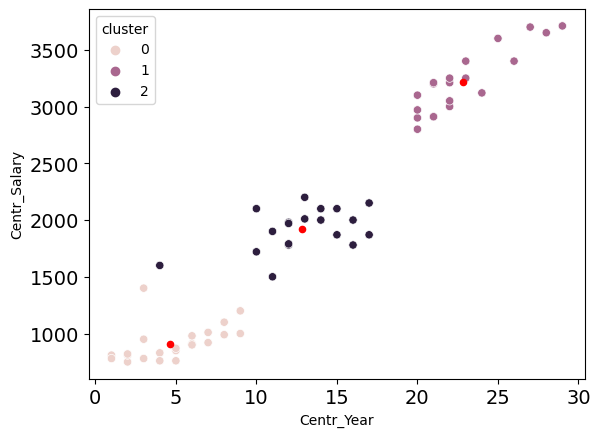

In [30]:
# vẽ cụm và tâm của cụm
s1= sns.scatterplot(data=df_clustered, x='WorkingYears',y='Salary',hue='cluster')
centr.plot(ax=s1, kind='scatter',x='Centr_Year',y='Centr_Salary',color='red', fontsize=14)

In [32]:
# dự báo
clu_pred=km3.predict([[12,2100],[4,900],[10,1700]])
clu_pred

C:\Users\Thuong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2, 0, 2])